### Markov Chain and Hidden Markov Model

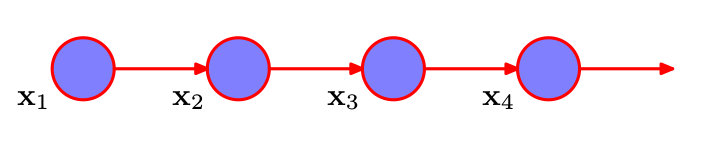

In [1]:
from IPython.display import Image
Image(filename='images/firstorder_markov.png')

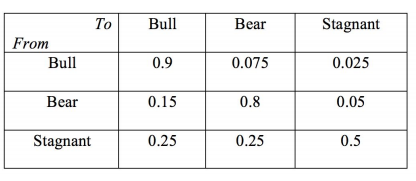

In [2]:
from IPython.display import Image
Image(filename='images/transition_matrix_1.png')

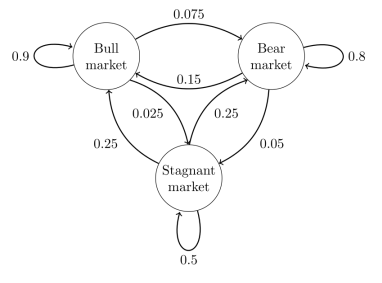

In [3]:
from IPython.display import Image
Image(filename='images/transition_graph.png')

In [14]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]])

### 1. Generate a time series data for 10000 time steps using the given conditional probability. You can 

### assume the initial state to be sampled from a uniform distribution.

In [5]:
time_series = [];

rand_num = np.random.rand()
cut_off = [1/3, 1/3, 1/3]
if(rand_num <= cut_off[0]):
    time_series.append(0)
elif(rand_num > cut_off[0] and rand_num <= cut_off[0] + cut_off[1]):
    time_series.append(1)
elif(rand_num > cut_off[0] + cut_off[1]):
    time_series.append(2)

for i in range(10000-1):
    rand_num = np.random.rand()
    cut_off = A[time_series[-1]]
#     print(cut_off)
    if(rand_num <= cut_off[0]):
        time_series.append(0)
    elif(rand_num > cut_off[0] and rand_num <= cut_off[0] + cut_off[1]):
        time_series.append(1)
    elif(rand_num > cut_off[0] + cut_off[1]):
        time_series.append(2)

# print(time_series)

time_series_name = []

for i in range(10000):
    if(time_series[i] == 0):
        time_series_name.append('Bull')
    elif(time_series[i] == 1):
        time_series_name.append('Bear')
    elif(time_series[i] == 2):
        time_series_name.append('Stagnant')

print(time_series_name)


['Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bear', 'Bear', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Stagnant', 'Stagnant', 'Stagnant', 'Stagnant', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Stagnant', 'Stagnant', 'Stagnant', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bear', 'Stagnant', 'Bear', 'Bear', 'Stagnant', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Stagnant', 'Stagnant', 'Stagnant', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Stagnant', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Stagnant', 'Stagnant', 'Bull', 'Bear', 'Bull', 'Bull', 'Bull', 'Bull', 'Bull', 'Bu

### 2. Compute probability of market condition corresponding to bull, bear, stagnant, bear, bear 

In [6]:
sequence_name = ['Bull', 'Bear', 'Stagnant', 'Bear', 'Bear']
sequence = []

for i in range(len(sequence_name)):
    if(sequence_name[i] == 'Bull'):
        sequence.append(0)
    elif(sequence_name[i] == 'Bear'):
        sequence.append(1)
    elif(sequence_name[i] == 'Stagnant'):
        sequence.append(2)

def probab_seq(seq):
    p = 1/3;
    for i in range(1, len(seq)):
        p = p*A[seq[i-1]][seq[i]]
    return p;

print("Probab of Seq: ", probab_seq(sequence))

Probab of Seq:  0.00025


### 3.  With the generated sequence, reverse estimate the conditional probability values using MLE

In [7]:
A_estimate = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

for i in range(len(A_estimate)):
    for j in range(len(A_estimate)):
        count_transaction = 0;
        total_transaction = 0;
        for k in range(len(time_series)-1):
            if(time_series[k] == i):
                total_transaction += 1;
                if(time_series[k+1] == j):
                    count_transaction += 1;
                    
        A_estimate[i][j] = count_transaction/total_transaction

print("Estimated Probabilities: ")
print(np.matrix(A_estimate))
print()
print("Actual Probabilities: ")
print(A)

Estimated Probabilities: 
[[0.90358603 0.0723498  0.02406417]
 [0.15078329 0.79928198 0.04993473]
 [0.25996534 0.26863085 0.47140381]]

Actual Probabilities: 
[[0.9   0.075 0.025]
 [0.15  0.8   0.05 ]
 [0.25  0.25  0.5  ]]


### 4. Given the state of the current week as bear, calculate the probabilities of a bull, bear or stagnant 

### market over 100 weeks and plot graph of probability vs time

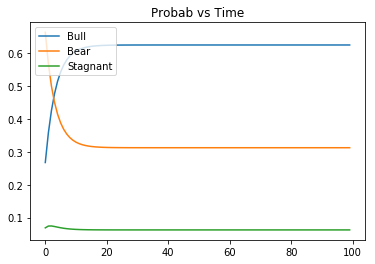

In [8]:
initial_v = A[1]

probab_bull = []
probab_bear = []
probab_stagnant = []

v = initial_v
A_new = np.matrix(A)
for i in range(100):
    v = np.array(v*A_new)[0]
    probab_bull.append(v[0])
    probab_bear.append(v[1])
    probab_stagnant.append(v[2])

plt.plot(probab_bull, label = "Bull")
plt.plot(probab_bear, label = "Bear")
plt.plot(probab_stagnant, label = "Stagnant")
plt.legend()
plt.title('Probab vs Time')
plt.show()

### 5. Does the Markov chain attain a steady state? Calculate steady state probability v using vT A = vT => ATv = v and compare with the above estimate

In [37]:
from scipy.linalg import eig
w,vl,vr = eig(A,left = True)
print((1/sum(vl[0])*vl[0]))

[0.37018078 0.53709187 0.09272736]


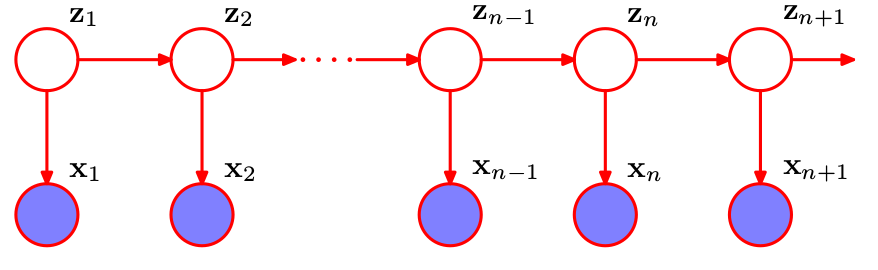

In [38]:
from IPython.display import Image
Image(filename='images/hmm.png')

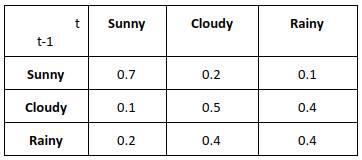

In [25]:
from IPython.display import Image
Image(filename='images/transition_matrix.png')

In [26]:
A = np.array([[0.7,0.2,0.1],[0.1,0.5,0.4],[0.2,0.4,0.4]])
E = np.array([[0.4,0.4,0.2],[0.1,0.4,0.5],[0.1,0.3,0.6]])
I = np.array([0.2,0.3,0.5])

### a) Generate a sequence of hidden states for 5 time steps

In [42]:
time_series = [];

rand_num = np.random.rand()
cut_off = I
if(rand_num <= cut_off[0]):
    time_series.append(0)
elif(rand_num > cut_off[0] and rand_num <= cut_off[0] + cut_off[1]):
    time_series.append(1)
elif(rand_num > cut_off[0] + cut_off[1]):
    time_series.append(2)

for i in range(6-1):
    rand_num = np.random.rand()
    cut_off = A[time_series[-1]]
#     print(cut_off)
    if(rand_num <= cut_off[0]):
        time_series.append(0)
    elif(rand_num > cut_off[0] and rand_num <= cut_off[0] + cut_off[1]):
        time_series.append(1)
    elif(rand_num > cut_off[0] + cut_off[1]):
        time_series.append(2)

print(time_series)

[2, 0, 0, 2, 1, 1]


### b) Corresponding to the generated latent space, predict the weather conditions for the same time

In [43]:
weather_condition = []

for i in range(len(time_series)):
    hidden_state = time_series[i]
    rand_num = np.random.rand()
    cut_off = E[hidden_state]
#     print(cut_off)
    if(rand_num <= cut_off[0]):
        weather_condition.append("Sunny")
    elif(rand_num > cut_off[0] and rand_num <= cut_off[0] + cut_off[1]):
        weather_condition.append("Cloudy")
    elif(rand_num > cut_off[0] + cut_off[1]):
        weather_condition.append("Rainy")

print(weather_condition)

['Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy']


### c) A weather condition of sunny, cloudy, rainy was observed over 3 days. Compute the probability

In [40]:
p = np.zeros((3,3,3))
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            p[i,j,k] = E[i,0]*A[i,j]*E[j,1]*A[j,k]*E[k,2]

prob = 0

for j in range(0,3):
    for k in range(0,3):
        prob += 0.2*p[0,j,k]
for j in range(0,3):
    for k in range(0,3):
        prob += 0.3*p[1,j,k] 
for j in range(0,3):
    for k in range(0,3):
        prob += 0.5*p[2,j,k]

print("Probability for given data: ", prob)

Probability for given data:  0.024444000000000007


### d) Find the most likely sequence of hidden states that might have caused the above observations

In [48]:
print(p.ravel())
print()
print("We see that most likely sequence of Hidden States is 0, 0, 0")

[0.01568 0.0112  0.00672 0.00064 0.008   0.00768 0.00048 0.0024  0.00288
 0.00056 0.0004  0.00024 0.0004  0.005   0.0048  0.00048 0.0024  0.00288
 0.00112 0.0008  0.00048 0.00032 0.004   0.00384 0.00048 0.0024  0.00288]

We see that most likely sequence of Hidden States is 0, 0, 0
